Step1. Data import and data clean

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel("/Users/mekalameghana/Desktop/RSB/Data Science/Data_Science(data).xlsx")

In [27]:
print(df.info())  # Overview of dataset
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Checking missing values
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Employee ID                        500 non-null    float64       
 1   Gender                             500 non-null    int64         
 2   Job Level after FY20 promotions    500 non-null    int64         
 3   New hire FY20?                     500 non-null    int64         
 4   FY20 Performance Rating            500 non-null    float64       
 5   Promotion in FY21?                 500 non-null    int64         
 6   In base group for Promotion FY21   500 non-null    int64         
 7   Target hire balance                500 non-null    float64       
 8   FY20 leaver?                       500 non-null    int64         
 9   In base group for turnover FY20    500 non-null    int64         
 10  Department @01.07.2020             500

,Employee ID,Gender,Job Level after FY20 promotions,New hire FY20?,FY20 Performance Rating,Promotion in FY21?,In base group for Promotion FY21,Target hire balance,FY20 leaver?,In base group for turnover FY20,...,Last hire date,Years since last hire,GRADE,FUNCTION,OC_RATE,PERFORM,Y_GRADE,AGE,Y_SERVIC,Rank 2
0,1.0,1,5,0,2.0,0,0,0.5,1,1,...,2017-04-01,3.0,1 - Junior Officer,Operations,1.0,2.0,1.0,48.0,6.0,74.0
1,2.0,0,3,0,3.0,0,1,0.5,0,1,...,2017-04-01,3.0,3 - Manager,Sales & Marketing,1.0,2.0,3.0,29.0,1.0,320.0
2,3.0,1,1,0,2.0,0,1,0.5,0,1,...,2015-04-01,5.0,5 - Director,Strategy,1.0,3.0,1.0,31.0,5.0,66.0
3,4.0,1,3,0,3.0,0,1,0.5,0,1,...,2012-04-01,8.0,3 - Manager,HR,1.0,3.0,1.0,27.0,1.0,153.0
4,5.0,0,5,0,2.0,0,1,0.5,0,1,...,2019-04-01,1.0,1 - Junior Officer,Sales & Marketing,1.0,3.0,4.0,36.0,1.0,460.0


In [29]:
df.columns

Index(['Employee ID', 'Gender', 'Job Level after FY20 promotions',
       'New hire FY20?', 'FY20 Performance Rating', 'Promotion in FY21?',
       'In base group for Promotion FY21', 'Target hire balance',
       'FY20 leaver?', 'In base group for turnover FY20',
       'Department @01.07.2020', 'Leaver FY',
       'Job Level after FY21 promotions', 'Last Department in FY20',
       'FTE group', 'Time type', 'Department & JL group PRA status',
       'Department & JL group for PRA', 'Job Level group PRA status',
       'Job Level group for PRA', 'Time in Job Level @01.07.2020',
       'Job Level before FY20 promotions', 'Promotion in FY20?',
       'FY19 Performance Rating', 'Age group', 'Age @01.07.2020',
       'Nationality 1', 'Region group: nationality 1',
       'Broad region group: nationality 1', 'Last hire date',
       'Years since last hire', 'GRADE', 'FUNCTION', 'OC_RATE', 'PERFORM',
       'Y_GRADE', 'AGE', 'Y_SERVIC', 'Rank 2'],
      dtype='object')

In [31]:
df.isnull().sum()

Employee ID                          0
Gender                               0
Job Level after FY20 promotions      0
New hire FY20?                       0
FY20 Performance Rating              0
Promotion in FY21?                   0
In base group for Promotion FY21     0
Target hire balance                  0
FY20 leaver?                         0
In base group for turnover FY20      0
Department @01.07.2020               0
Leaver FY                            0
Job Level after FY21 promotions      0
Last Department in FY20              0
FTE group                            0
Time type                            0
Department & JL group PRA status     0
Department & JL group for PRA        0
Job Level group PRA status           0
Job Level group for PRA              0
Time in Job Level @01.07.2020        0
Job Level before FY20 promotions     0
Promotion in FY20?                   0
FY19 Performance Rating              0
Age group                            0
Age @01.07.2020          

In [33]:
df['Leaver FY'] = df['Leaver FY'].fillna('Not left')  

In [14]:
df.isnull().sum()

Employee ID                            0
Gender                                 0
Job Level after FY20 promotions        0
New hire FY20?                         0
FY20 Performance Rating               87
Promotion in FY21?                     0
In base group for Promotion FY21       0
Target hire balance                    0
FY20 leaver?                           0
In base group for turnover FY20        0
Department @01.07.2020                 0
Leaver FY                              0
Job Level after FY21 promotions       47
Last Department in FY20                0
FTE group                              0
Time type                              0
Department & JL group PRA status      62
Department & JL group for PRA         62
Job Level group PRA status            62
Job Level group for PRA               62
Time in Job Level @01.07.2020          0
Job Level before FY20 promotions      66
Promotion in FY20?                     0
FY19 Performance Rating              114
Age group       

In [35]:


# Filling categorical columns
obj_columns = df.select_dtypes(include="object").columns
for col in obj_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Filling numerical columns
number_columns = df.select_dtypes(include=['number']).columns
for col in number_columns:
    df[col] = df[col].fillna(df[col].mean())

print(df.isnull().sum())  # Verify missing values are handled

Employee ID                          0
Gender                               0
Job Level after FY20 promotions      0
New hire FY20?                       0
FY20 Performance Rating              0
Promotion in FY21?                   0
In base group for Promotion FY21     0
Target hire balance                  0
FY20 leaver?                         0
In base group for turnover FY20      0
Department @01.07.2020               0
Leaver FY                            0
Job Level after FY21 promotions      0
Last Department in FY20              0
FTE group                            0
Time type                            0
Department & JL group PRA status     0
Department & JL group for PRA        0
Job Level group PRA status           0
Job Level group for PRA              0
Time in Job Level @01.07.2020        0
Job Level before FY20 promotions     0
Promotion in FY20?                   0
FY19 Performance Rating              0
Age group                            0
Age @01.07.2020          

In [18]:
df.isnull().sum()

Employee ID                          0
Gender                               0
Job Level after FY20 promotions      0
New hire FY20?                       0
FY20 Performance Rating              0
Promotion in FY21?                   0
In base group for Promotion FY21     0
Target hire balance                  0
FY20 leaver?                         0
In base group for turnover FY20      0
Department @01.07.2020               0
Leaver FY                            0
Job Level after FY21 promotions      0
Last Department in FY20              0
FTE group                            0
Time type                            0
Department & JL group PRA status     0
Department & JL group for PRA        0
Job Level group PRA status           0
Job Level group for PRA              0
Time in Job Level @01.07.2020        0
Job Level before FY20 promotions     0
Promotion in FY20?                   0
FY19 Performance Rating              0
Age group                            0
Age @01.07.2020          

### Handling Outliers
Outliers can distort analysis and predictions. Use the Interquartile Range (IQR) method to detect and replace outliers.

In [22]:
import numpy as np

for col in number_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median values
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])


### Encoding Categorical Variables
Machine learning models work with numerical data, so categorical variables need to be encoded.

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert categorical columns to string type
obj_columns = df.select_dtypes(include="object").columns
for col in obj_columns:
    df[col] = df[col].astype(str)  # Convert to string type
    df[col] = le.fit_transform(df[col])  # Apply Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for ordinal variables
le = LabelEncoder()
for col in obj_columns:
    df[col] = le.fit_transform(df[col])  

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=obj_columns, drop_first=True)


### Feature Scaling
Standardization or normalization ensures all features have similar importance in the model.

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # Use MinMaxScaler() for normalization
df[number_columns] = scaler.fit_transform(df[number_columns])


### Correlation Analysis

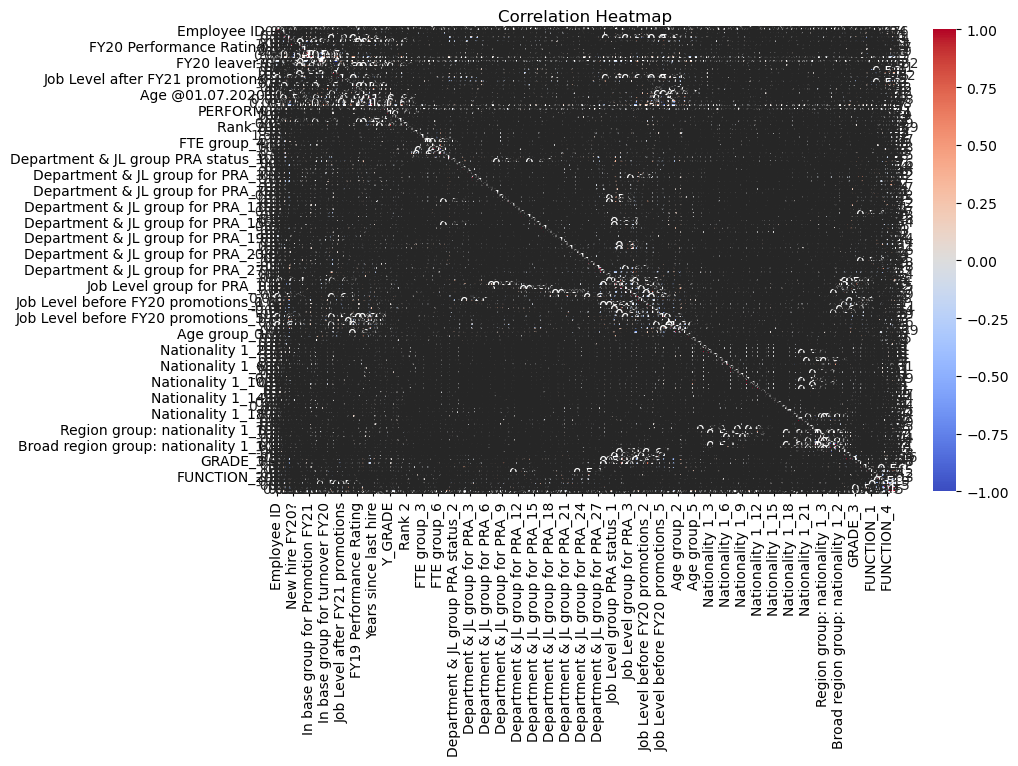

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Distribution Analysis

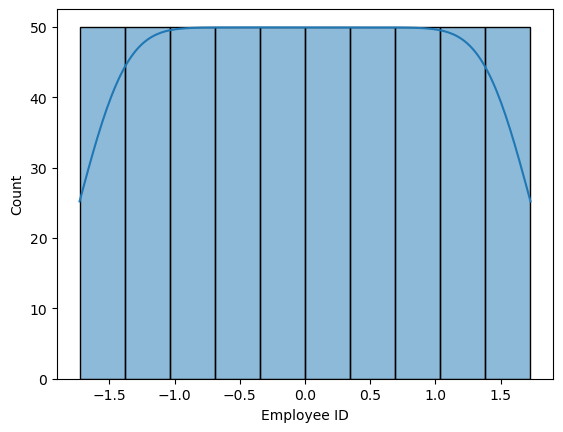

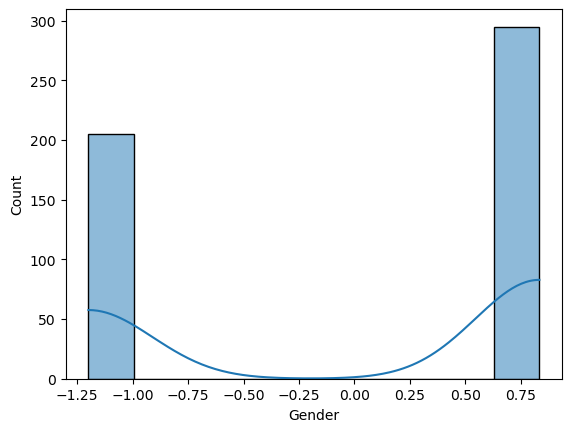

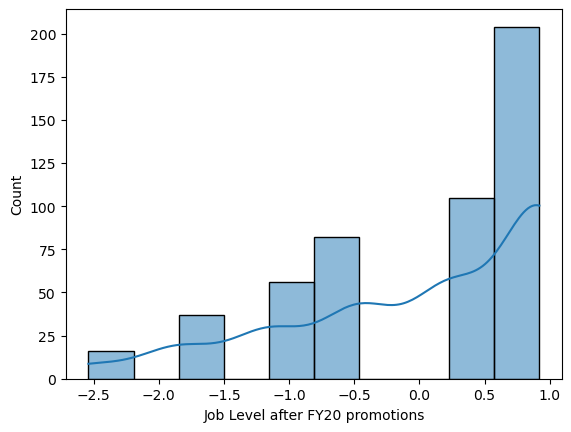

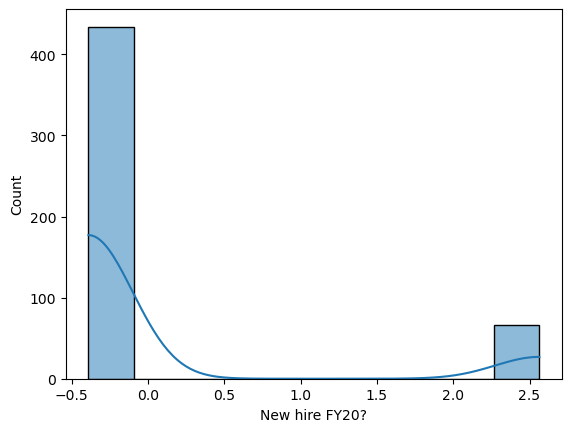

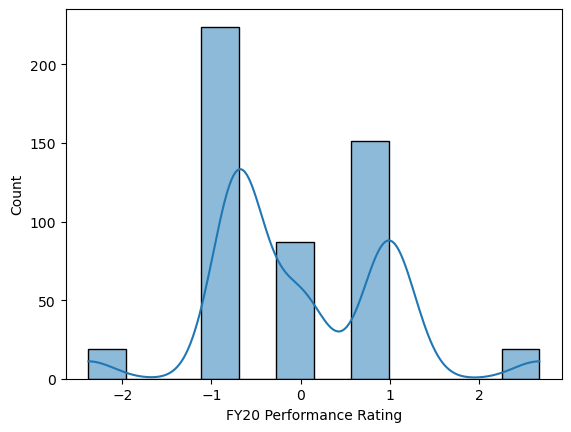

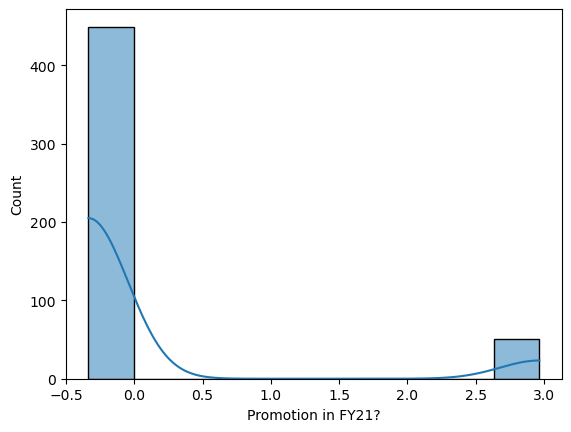

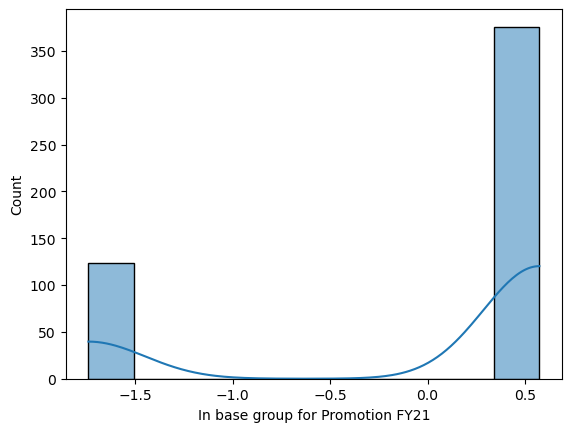

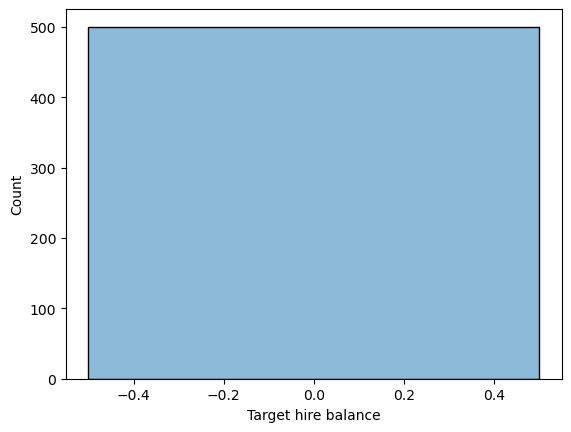

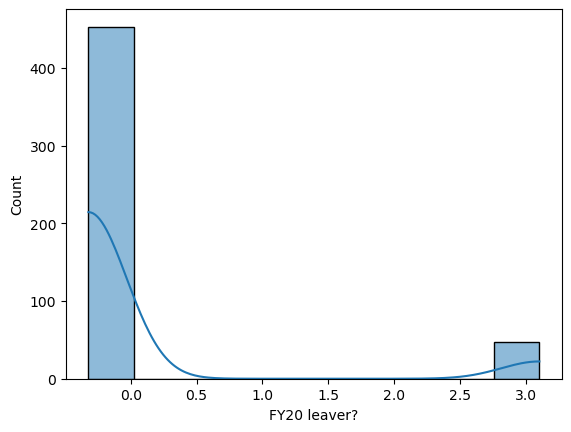

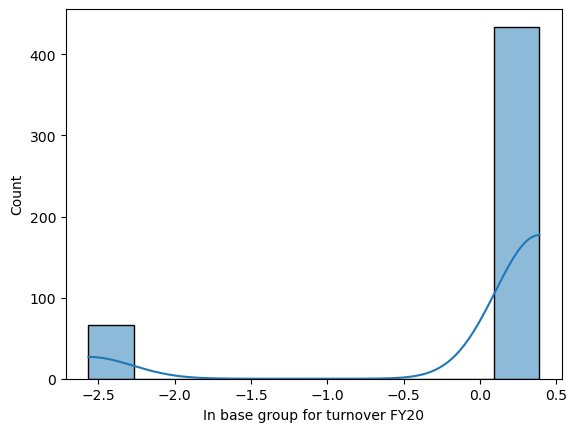

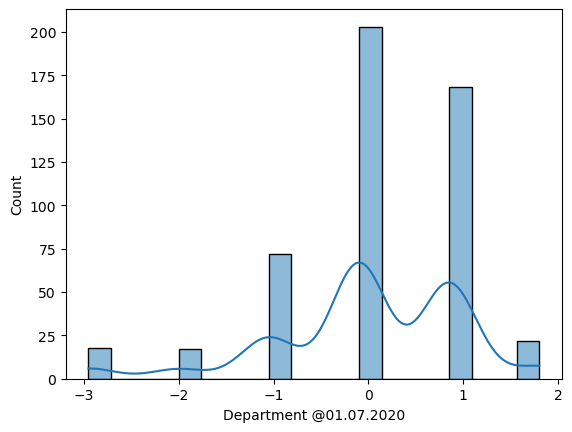

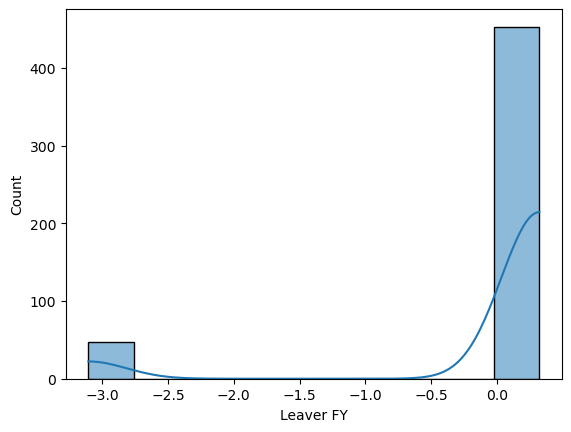

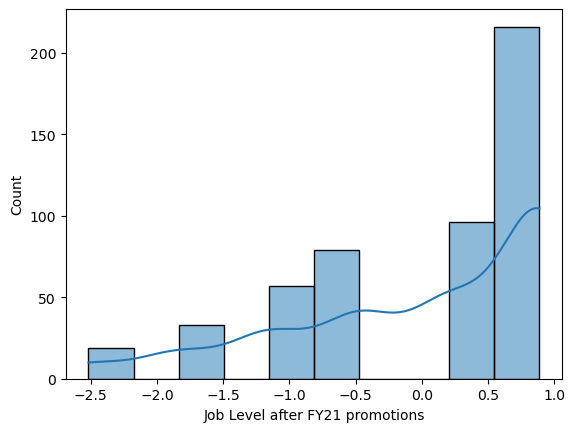

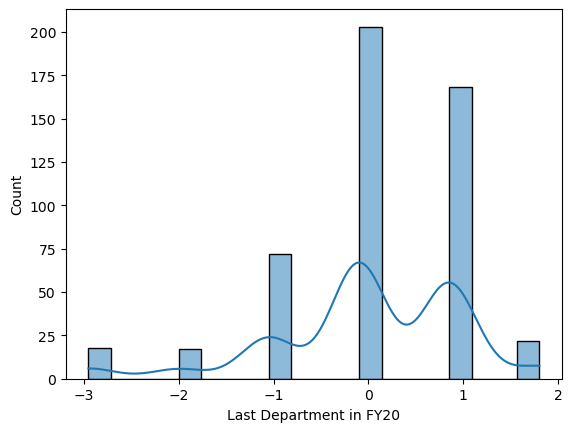

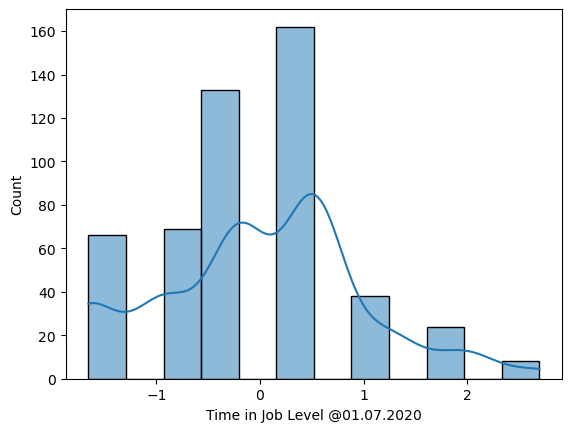

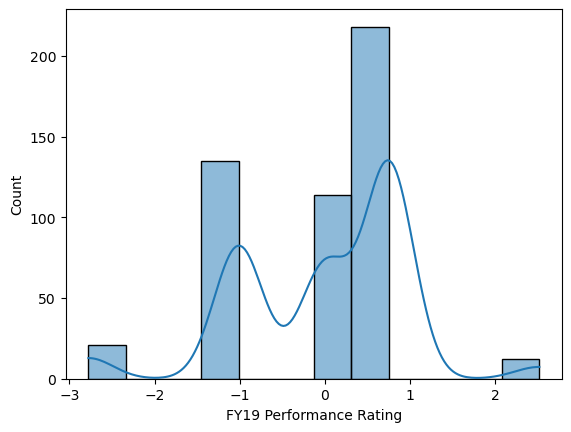

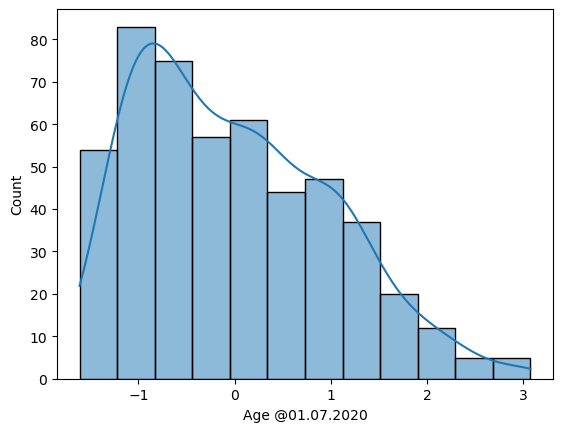

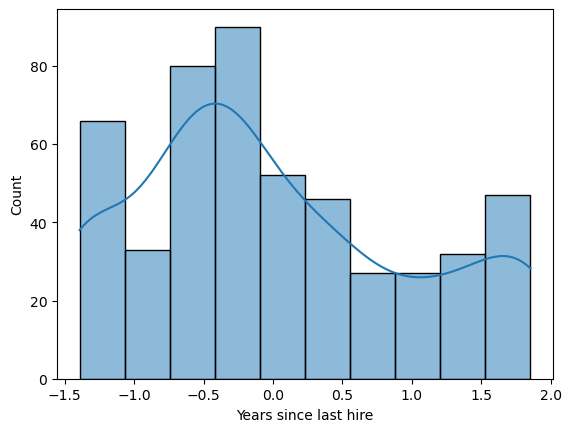

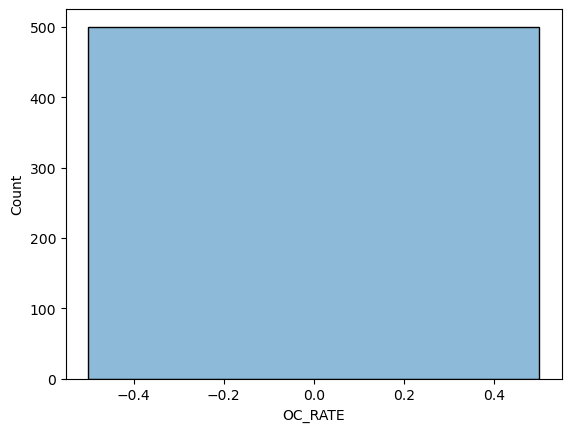

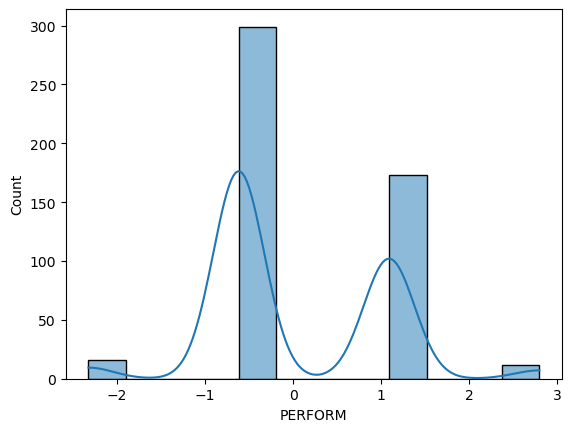

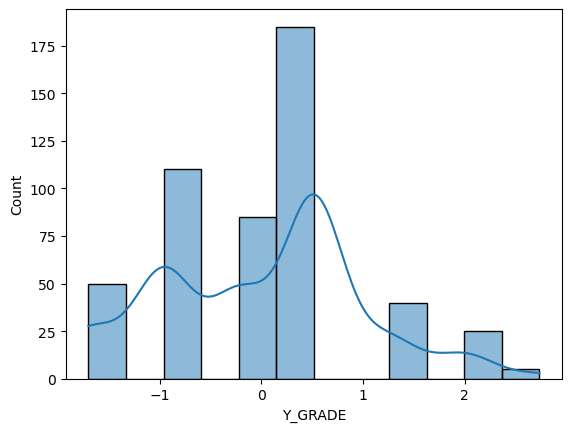

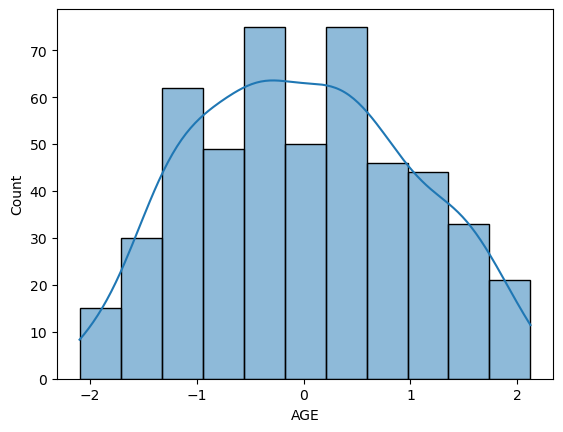

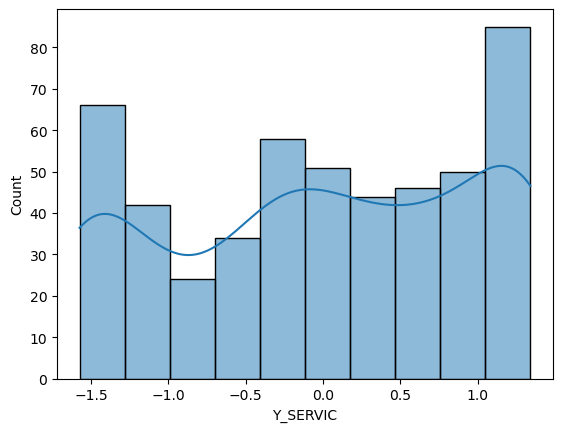

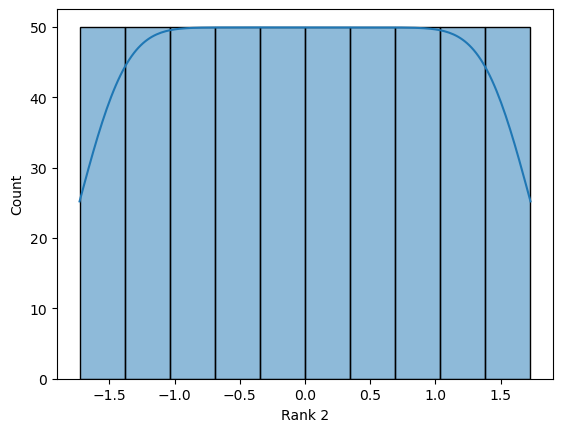

In [44]:
for col in number_columns:
    sns.histplot(df[col], kde=True)
    plt.show()


### -Applying Machine Learning Models
Once the data is cleaned and processed, apply machine learning models
### Splitting Data

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('target_column', axis=1)  # Replace 'target_column' with the actual column name
y = df['target_column']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['target_column'] not found in axis"

#### Training a Model

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


NameError: name 'X_train' is not defined